Importing Libraries

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

Importing the dataset and checking it's dimensions.

In [5]:
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


Converting all the images to pixels

In [6]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')

x_train_flat /= 255.0
x_test_flat /= 255.0


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

**Initialising the classifiers**

In [7]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_flat, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_classifier.fit(x_train_flat, y_train)

#svm_classifier= SVC(kernel='linear')
#svm_classifier.fit(x_train_flat, y_train)


knn_classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn_classifier.fit(x_train_flat, y_train)


KNeighborsClassifier(n_jobs=-1)

In [12]:
classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    #"SVC": svm_classifier,                   # all the ML models
    "KNN (k=5)": knn_classifier
}

**Model Evaluation**

 accuracy , precision , Recall and F1 score

In [13]:

for clf_name, clf in classifiers.items():
    y_pred = clf.predict(x_test_flat)
    accuracy = clf.score(x_test_flat, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(clf_name + ":\n")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")

Decision Tree:

Accuracy: 0.2717
Precision: 0.2714453339712418
Recall: 0.2717
F1 Score: 0.27142077637202855


Random Forest:

Accuracy: 0.4647
Precision: 0.4600031239017713
Recall: 0.46469999999999995
F1 Score: 0.46082044915372744


KNN (k=3):

Accuracy: 0.3398
Precision: 0.43042618255284965
Recall: 0.3398
F1 Score: 0.3260170986061005




In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Decision Tree:

Accuracy: 0.2607
Confusion Matrix:
[[353  65 100  59  66  42  39  44 158  74]
 [ 81 242  69  77  58  71  71  81  89 161]
 [ 89  50 188 110 144  95 112  97  74  41]
 [ 72  65 103 169 106 156 140  93  40  56]
 [ 67  51 130  99 246  82 148 110  32  35]
 [ 53  51  97 147  94 264  84 105  46  59]
 [ 38  66 108 110 141 104 271  86  30  46]
 [ 66  69 105  90 126  96  63 234  42 109]
 [163  98  51  52  53  59  25  51 348 100]
 [ 90 174  67  68  45  59  38  73  94 292]]




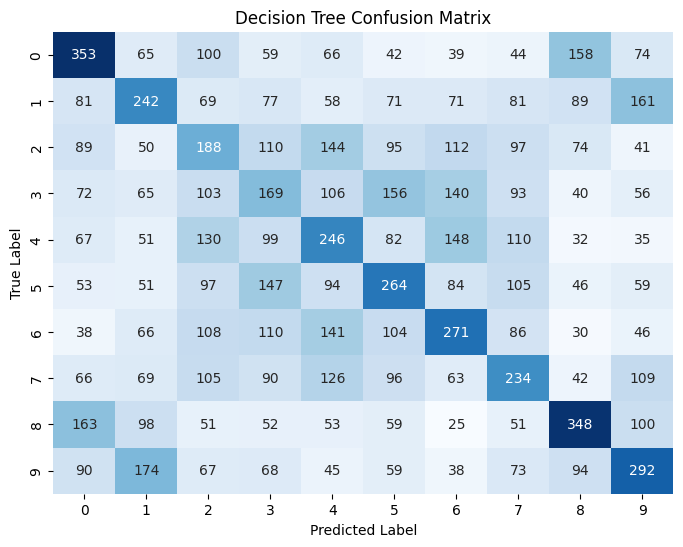

Random Forest:

Accuracy: 0.4597
Confusion Matrix:
[[566  25  56  19  32  22  27  28 159  66]
 [ 33 554  18  38  23  30  32  30  63 179]
 [109  49 317  73 158  71 111  58  28  26]
 [ 55  51  64 266  93 178 140  61  22  70]
 [ 57  28 141  56 394  44 151  84  28  17]
 [ 31  34  74 152  93 376  83  91  32  34]
 [ 11  45  77  68 119  62 547  24   8  39]
 [ 51  42  37  57 114  81  47 439  26 106]
 [100  81  18  28  27  44  10  16 591  85]
 [ 49 167  16  35  22  20  27  46  71 547]]




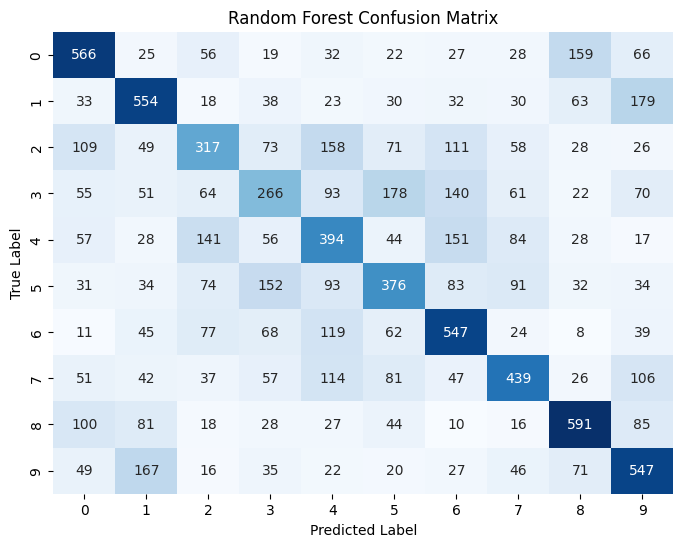

KNN (k=5):

Accuracy: 0.3317
Confusion Matrix:
[[540   8 112  23  50   4  24   4 234   1]
 [146 202 110  42 157  33  61  10 223  16]
 [128   4 446  49 217  30  67   7  50   2]
 [ 79   9 232 208 189 102 109  14  56   2]
 [ 80   2 273  37 485  15  42  13  52   1]
 [ 73   5 221 151 187 215  79  13  51   5]
 [ 27   3 284  66 302  31 257   2  27   1]
 [107   9 176  60 280  49  58 182  72   7]
 [143  10  47  40  63  15  11   7 657   7]
 [181  52  95  59 124  27  49  22 266 125]]




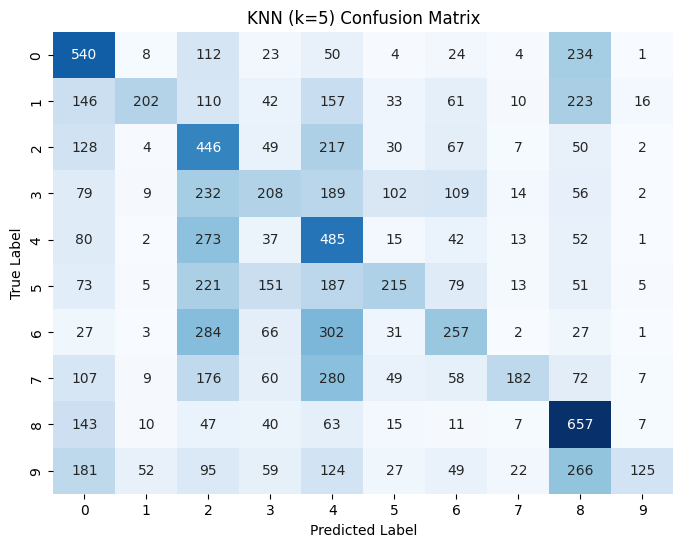

In [22]:
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(x_test_flat)
    accuracy = clf.score(x_test_flat, y_test)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(clf_name + ":\n")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")                                        # printing the confusion matrix for all the models
    print(confusion_mat)
    print("\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

20% of 80% validation set

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [25]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')
x_val_flat = x_val_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')


x_train_flat /= 255.0
x_val_flat /= 255.0
x_test_flat /= 255.0

In [26]:
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)
y_test = np.squeeze(y_test)

In [27]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_flat, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_classifier.fit(x_train_flat, y_train)

#svm_classifier= SVC(kernel='linear')
#svm_classifier.fit(x_train_flat, y_train)


knn_classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn_classifier.fit(x_train_flat, y_train)


KNeighborsClassifier(n_jobs=-1)

In [28]:
classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    #"Naive Bayes": nb_classifier,
    "KNN (k=5)": knn_classifier
}

Decision Tree:

Validation Accuracy: 0.258375
Precision: 0.2595485343222015
Recall: 0.2582592678844962
F1 Score: 0.2585859466663406
Confusion Matrix:
[[271  50  82  56  57  37  23  45 119  63]
 [ 80 200  39  63  37  52  52  49  76 130]
 [ 77  41 148  66 129  91  71  77  49  39]
 [ 50  48  86 141  84 125 109  68  54  46]
 [ 57  35 105  87 208  72 105  54  31  38]
 [ 23  45  76 138  94 166  77  81  42  42]
 [ 42  41  95  92 105  79 200  60  23  37]
 [ 50  40  71  92  92  84  61 239  42  78]
 [119  60  52  52  47  37  32  31 278  80]
 [ 62 148  42  61  48  59  47  58  92 216]]




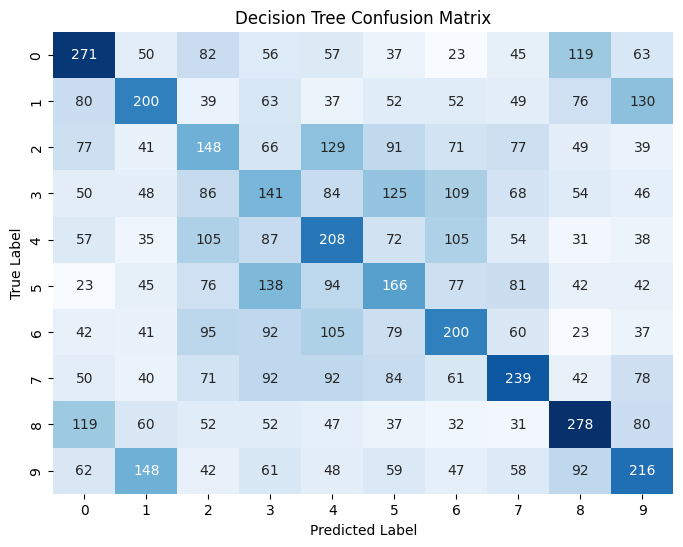

Random Forest:

Validation Accuracy: 0.454
Precision: 0.4513898296926465
Recall: 0.4542313243650863
F1 Score: 0.4508024884736491
Confusion Matrix:
[[413  36  42  12  35  20  19  29 130  67]
 [ 22 408   9  19  36  24  31  38  44 147]
 [ 76  40 252  48 120  54  97  45  32  24]
 [ 47  26  65 226  65 130 125  56  19  52]
 [ 44  31  95  51 308  47 105  65  21  25]
 [ 24  34  67 124  60 309  69  50  20  27]
 [ 14  38  57  52  84  54 427  19   8  21]
 [ 30  42  40  52 101  60  49 384  19  72]
 [ 80  74  10  31  16  28   8  15 462  64]
 [ 32 156  15  26  18  28  29  38  48 443]]




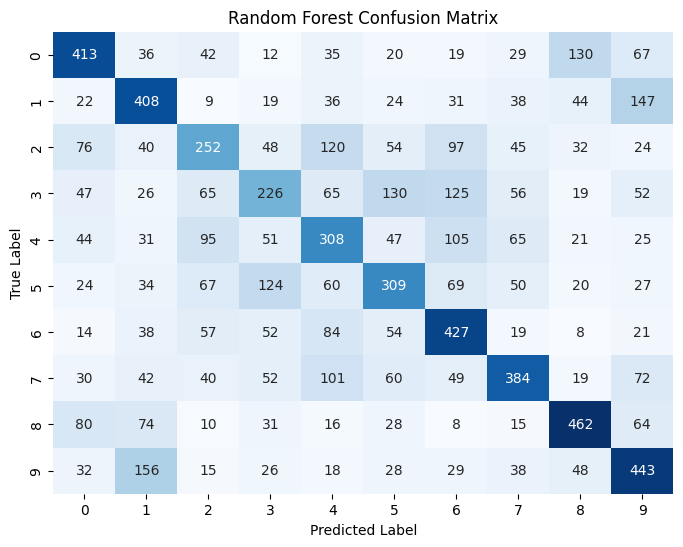

KNN (k=5):

Validation Accuracy: 0.324125
Precision: 0.42157855958936563
Recall: 0.32589058076896504
F1 Score: 0.31103416215926705
Confusion Matrix:
[[423   4  79  13  60   6  12   3 199   4]
 [ 98 147  87  30 121  27  40  11 200  17]
 [ 91   3 329  27 206  29  49   3  48   3]
 [ 61   6 193 157 166  82  89  13  41   3]
 [ 76   3 213  32 379  16  33   5  34   1]
 [ 35   8 169 113 168 182  65  14  25   5]
 [ 28   9 189  47 236  37 203   1  23   1]
 [ 75   6 164  50 245  36  49 162  57   5]
 [122   7  40  21  57  19   7   5 508   2]
 [131  45  81  37 116  26  52  23 219 103]]




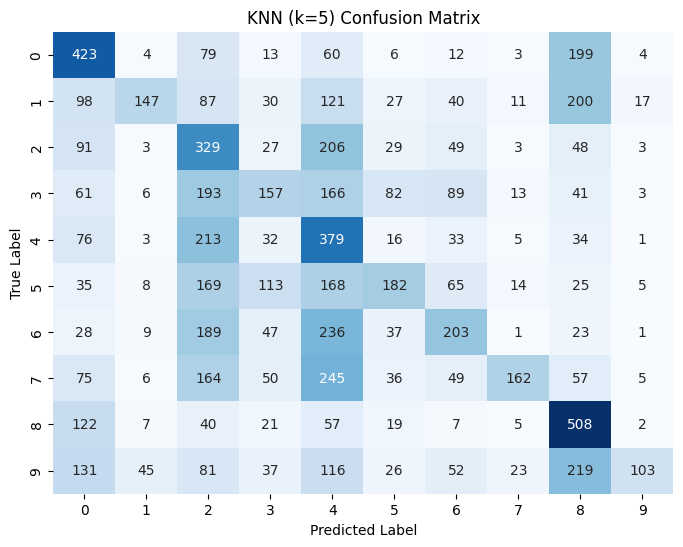

In [29]:
for clf_name, clf in classifiers.items():
    y_pred_val = clf.predict(x_val_flat)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average='macro')
    recall = recall_score(y_val, y_pred_val, average='macro')
    f1 = f1_score(y_val, y_pred_val, average='macro')
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(clf_name + ":\n")
    print("Validation Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')


x_train_flat /= 255.0
x_test_flat /= 255.0


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)


In [32]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    #"Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

3 fold cross-validation

Decision Tree Cross-Validation Results:

Average Accuracy: 0.26217998500944417
Average Precision: 0.2631990318836244
Average Recall: 0.26218086514749867
Average F1 Score: 0.2625489199496667




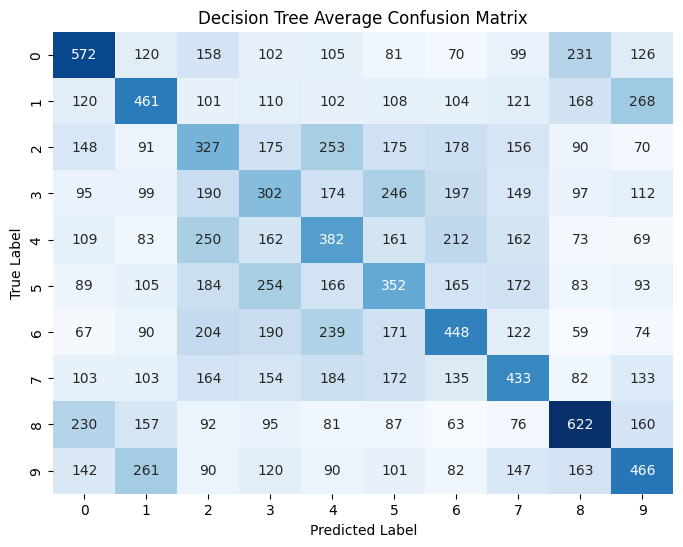

Random Forest Cross-Validation Results:

Average Accuracy: 0.4500400079601912
Average Precision: 0.44649744565836574
Average Recall: 0.4500418283690201
Average F1 Score: 0.4466151781295455




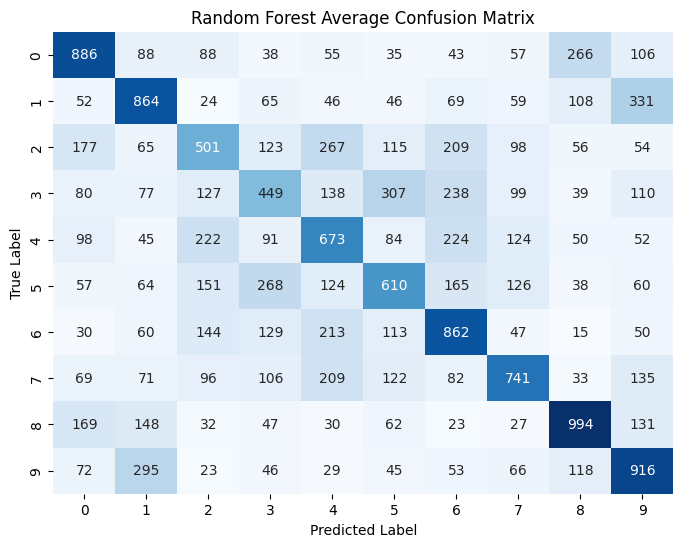

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.3254800114606132
Average Precision: 0.41694301642700715
Average Recall: 0.3254793579099306
Average F1 Score: 0.3104843457043133




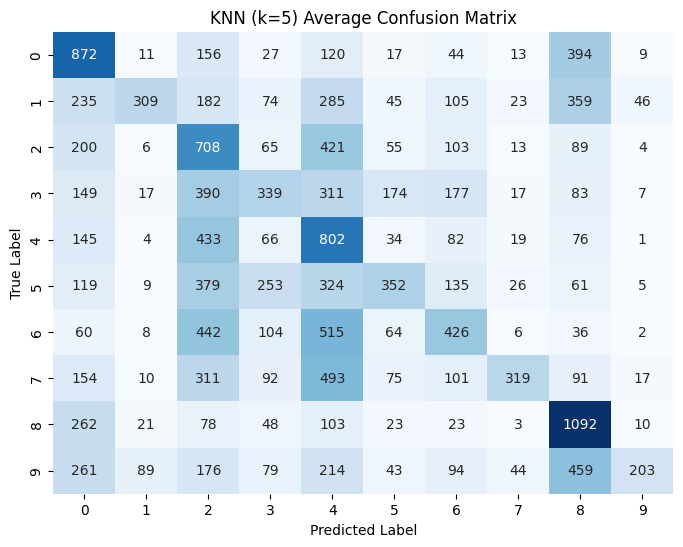

In [33]:
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


 5 fold cross validation

Decision Tree Cross-Validation Results:

Average Accuracy: 0.2598
Average Precision: 0.2604266065623085
Average Recall: 0.2598
Average F1 Score: 0.25992567729958826




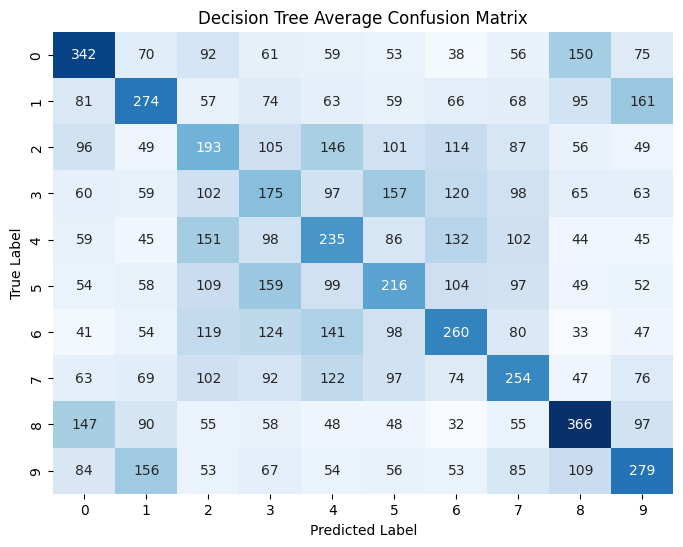

Random Forest Cross-Validation Results:

Average Accuracy: 0.45709999999999995
Average Precision: 0.45377192248629045
Average Recall: 0.45709999999999995
Average F1 Score: 0.45373088232563913




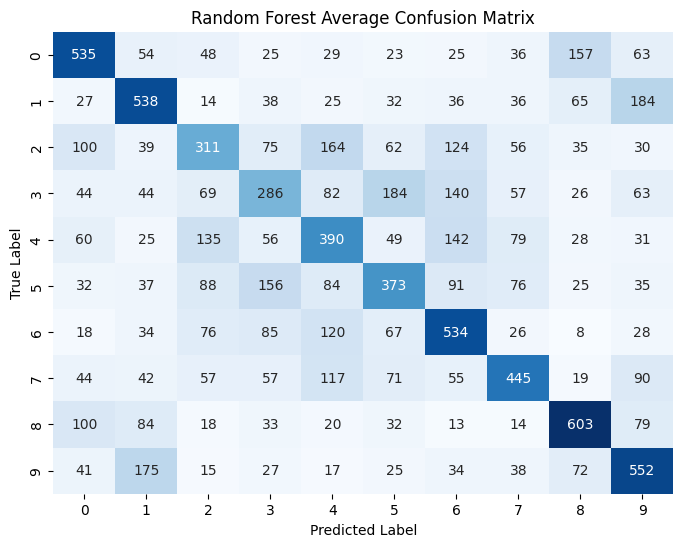

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.3327
Average Precision: 0.42636486152381925
Average Recall: 0.33270000000000005
Average F1 Score: 0.31852543093801977




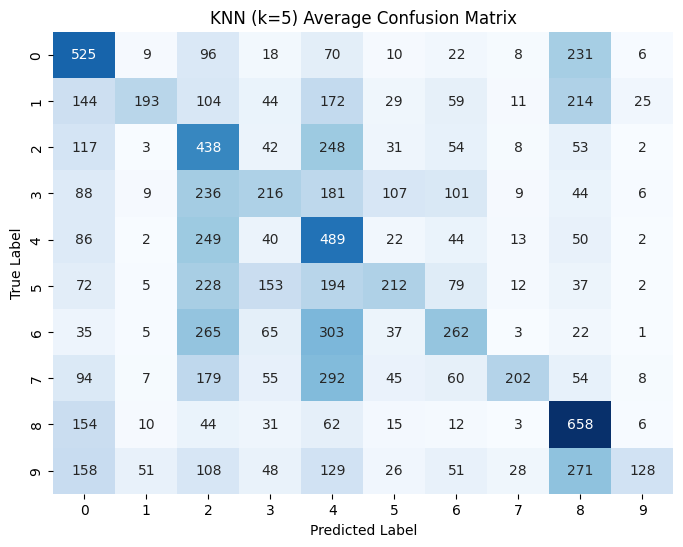

In [34]:
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


 10 fold cross validation

Decision Tree Cross-Validation Results:

Average Accuracy: 0.26232
Average Precision: 0.2630290735102657
Average Recall: 0.26232
Average F1 Score: 0.26248001195801685




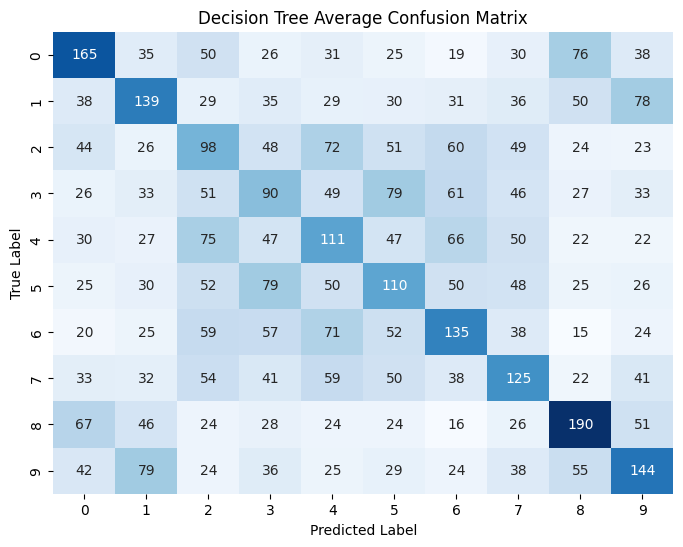

Random Forest Cross-Validation Results:

Average Accuracy: 0.46168
Average Precision: 0.4585521936443449
Average Recall: 0.46168000000000003
Average F1 Score: 0.45819004372955935




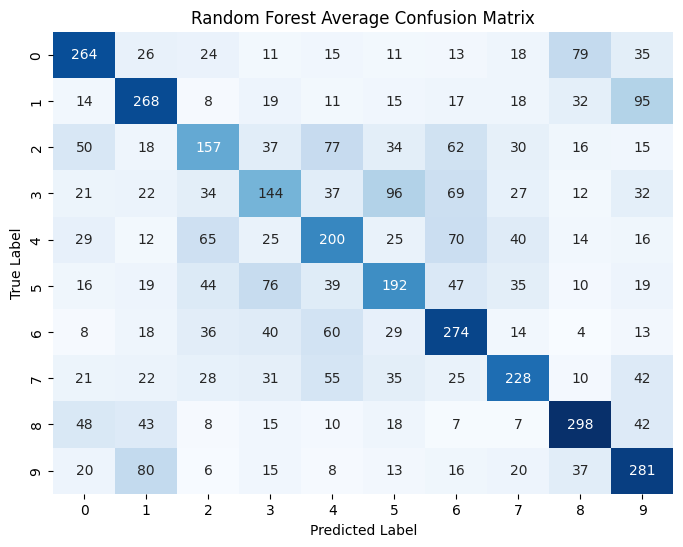

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.33602
Average Precision: 0.42893888417254233
Average Recall: 0.33602
Average F1 Score: 0.3223506850986591




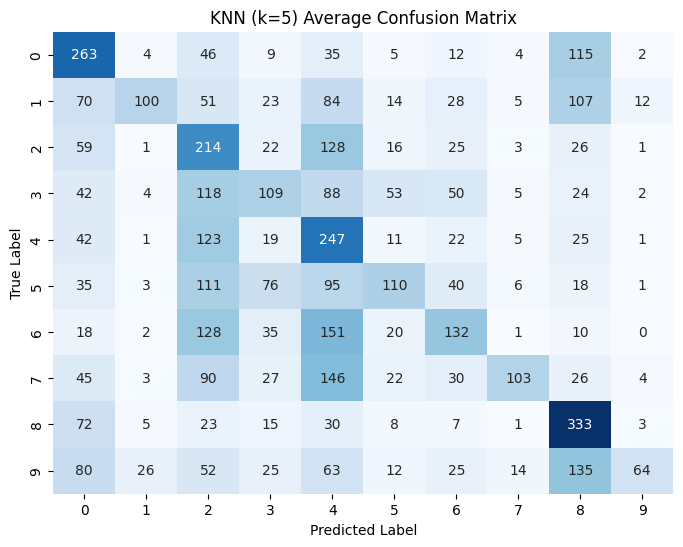

In [35]:
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


LOOCV leave one out cross validation

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert pixel values to float
x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')

# Normalize pixel values to range [0, 1]
x_train_flat /= 255.0
x_test_flat /= 255.0

# Convert labels to 1D array
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [3]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    #"Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

In [4]:
dt_classifier = DecisionTreeClassifier()


loo = LeaveOneOut()
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []
X_100 = x_train_flat[:100]
y_100 =y_train[:100]
for train_index, val_index in loo.split(x_train_flat):
    x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    dt_classifier.fit(X_100, y_100)
    y_pred_cv = dt_classifier.predict(x_val_cv)

    accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
    precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
    recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
    f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
    confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

print("Decision Tree Leave-One-Out Cross-Validation Results:\n")
print("Average Accuracy:", np.mean(accuracies))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1 Score:", np.mean(f1s))
print("\n")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_cla

KeyboardInterrupt: 

Greyscale

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 2s 0us/step


 random forest on the above greyscaled images

In [3]:
rf_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1)

# Train Random Forest classifier
rf_classifier.fit(x_train_flat, y_train)

# Predict on the test set
y_pred_test = rf_classifier.predict(x_test_flat)

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

In [4]:
print("Random Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)

Random Forest Performance on Test Set:

Test Accuracy: 0.4183
Precision: 0.4148786156074894
Recall: 0.4183
F1 Score: 0.4152873657520937
Confusion Matrix:
[[461  28  97  14  68  18  37  43 180  54]
 [ 36 485  17  32  31  30  71  43  71 184]
 [ 91  47 328  81 125  76 116  57  41  38]
 [ 75  45  82 245  94 148 132  76  25  78]
 [ 49  36 156  56 357  59 133  82  44  28]
 [ 59  34  89 135  75 373  69  87  40  39]
 [ 34  59  89  80 125  55 456  31  21  50]
 [ 48  53  54  58 104  83  43 406  50 101]
 [ 93  74  26  33  33  45  27  38 546  85]
 [ 41 159  18  33  22  28  38  49  86 526]]


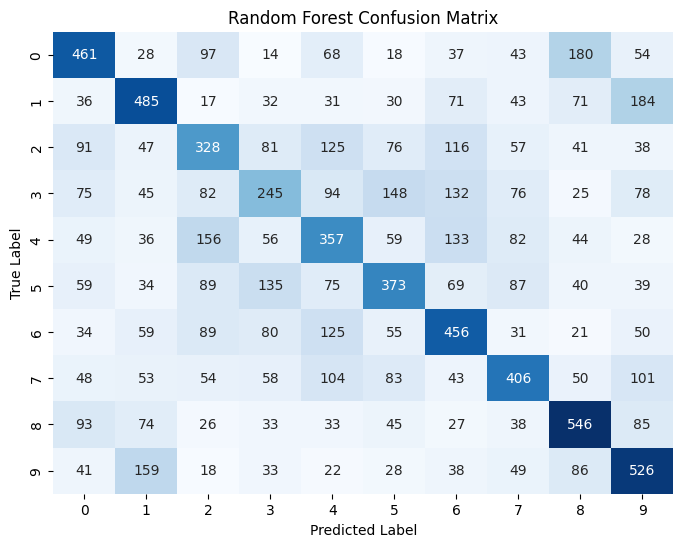

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)                                     # having a validation of 20% of the data
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_gray, y_train, test_size=0.2, random_state=42)


x_train_flat = x_train_split.reshape(x_train_split.shape[0], -1)
x_val_flat = x_val_split.reshape(x_val_split.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train_split = np.squeeze(y_train_split)
y_val_split = np.squeeze(y_val_split)
y_test = np.squeeze(y_test)

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1)


rf_classifier.fit(x_train_flat, y_train_split)

                                                                  # choosing random forest since it is the best classifer for the  colour images
y_pred_val = rf_classifier.predict(x_val_flat)


val_accuracy = accuracy_score(y_val_split, y_pred_val)
precision_val = precision_score(y_val_split, y_pred_val, average='macro')
recall_val = recall_score(y_val_split, y_pred_val, average='macro')
f1_val = f1_score(y_val_split, y_pred_val, average='macro')
confusion_mat_val = confusion_matrix(y_val_split, y_pred_val)


In [10]:
print("Random Forest Performance on Validation Set:\n")
print("Validation Accuracy:", val_accuracy)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("Confusion Matrix:")
print(confusion_mat_val)


y_pred_test = rf_classifier.predict(x_test_flat)


test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

Random Forest Performance on Validation Set:

Validation Accuracy: 0.4089
Precision: 0.40602325225196373
Recall: 0.4089474113833922
F1 Score: 0.40545850573726927
Confusion Matrix:
[[420  46  69  18  64  35  35  43 182  61]
 [ 31 470  12  50  31  25  49  39  77 195]
 [ 99  38 320  73 159  74 114  73  51  29]
 [ 61  49  78 241 124 178 130  57  36  69]
 [ 67  36 129  43 347  44 102  89  41  35]
 [ 58  48  78 123  95 355 112  77  37  32]
 [ 39  60 103  57 141  59 435  38  20  44]
 [ 49  41  52  51 118  72  63 407  55  86]
 [ 88  94  29  40  31  58  36  37 537  67]
 [ 30 182  22  26  23  25  40  51  84 557]]


In [11]:
print("\nRandom Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)



Random Forest Performance on Test Set:

Test Accuracy: 0.4088
Precision: 0.4050132579399482
Recall: 0.4088
F1 Score: 0.4053382182158097
Confusion Matrix:
[[468  30  92  23  66  24  40  34 172  51]
 [ 26 479  16  39  38  37  57  42  80 186]
 [ 92  34 316  80 152  70 115  64  39  38]
 [ 68  44  78 221  85 161 151  79  35  78]
 [ 64  35 144  44 365  55 132  89  46  26]
 [ 58  38  74 133  93 352  78  90  35  49]
 [ 42  69  91  68 123  49 455  30  20  53]
 [ 52  43  59  56 103  82  48 411  48  98]
 [ 96  88  32  26  29  53  20  48 522  86]
 [ 44 171  22  25  27  15  49  49  99 499]]


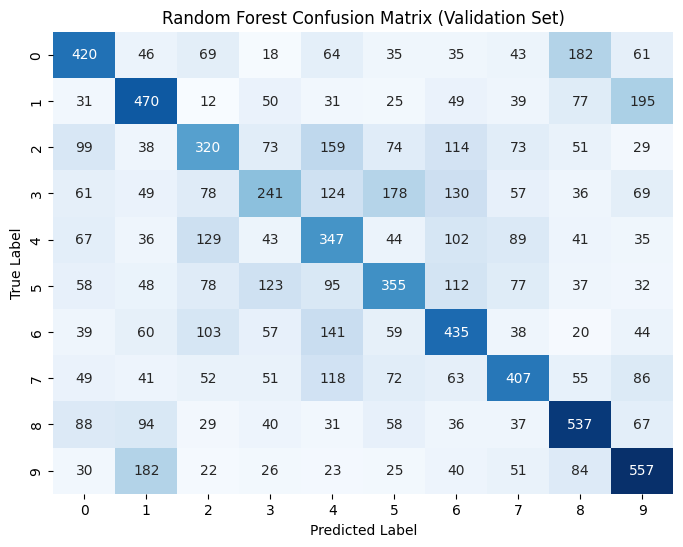

In [12]:
# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

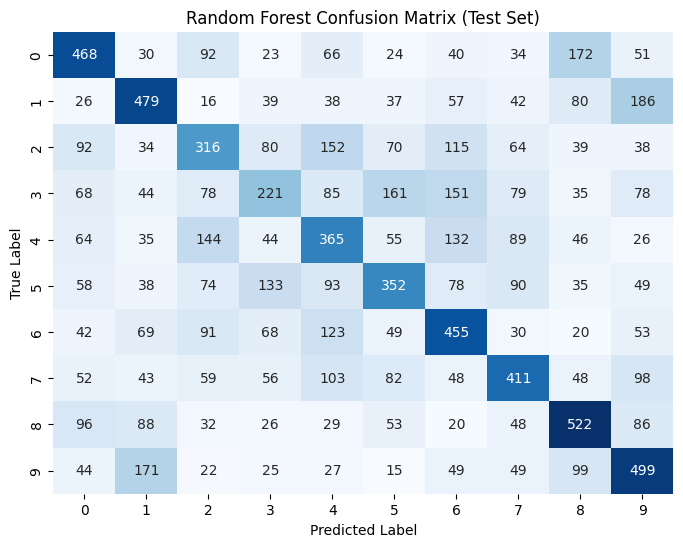

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Classwise performance using random forest **

In [14]:
from sklearn.metrics import classification_report

In [15]:
unique_classes = np.unique(y_test)

for cls in unique_classes:
    idx = np.where(y_test == cls)
    cls_name = str(cls)

    # Classification report for each class
    print(f"\nClassification Report for Class {cls_name}:")

    # Compute metrics only for the current class
    report = classification_report(y_test[idx], y_pred_test[idx], output_dict=True)

    # Print precision, recall, and F1-score for the current class
    print(f"Precision: {report[cls_name]['precision']:.2f}")
    print(f"Recall: {report[cls_name]['recall']:.2f}")
    print(f"F1-score: {report[cls_name]['f1-score']:.2f}")


Classification Report for Class 0:
Precision: 1.00
Recall: 0.47
F1-score: 0.64

Classification Report for Class 1:
Precision: 1.00
Recall: 0.48
F1-score: 0.65

Classification Report for Class 2:
Precision: 1.00
Recall: 0.32
F1-score: 0.48

Classification Report for Class 3:
Precision: 1.00
Recall: 0.22
F1-score: 0.36

Classification Report for Class 4:
Precision: 1.00
Recall: 0.36
F1-score: 0.53

Classification Report for Class 5:
Precision: 1.00
Recall: 0.35
F1-score: 0.52

Classification Report for Class 6:
Precision: 1.00
Recall: 0.46
F1-score: 0.63

Classification Report for Class 7:
Precision: 1.00
Recall: 0.41
F1-score: 0.58

Classification Report for Class 8:
Precision: 1.00
Recall: 0.52
F1-score: 0.69

Classification Report for Class 9:
Precision: 1.00
Recall: 0.50
F1-score: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Class Imbalance: Some classes have very low recall values, indicating that the model struggles to correctly classify instances of those classes. For example, classes 2, 3,4, 5 have low recall values, suggesting potential class imbalance issues where these classes are underrepresented in the training data.

The imbalanced distribution of classes can make it challenging for the model to learn from the minority classes, leading to poor performance on those classes